# Demo 1: k-nearest neighbors

# Read Data

In [1]:
from sklearn import datasets

In [2]:
# Load data
digits = datasets.load_digits()

In [3]:
print(digits.data.shape)

(1797, 64)


# Task 1: Visualization
Visualize some images (X) of digit with their label (y)

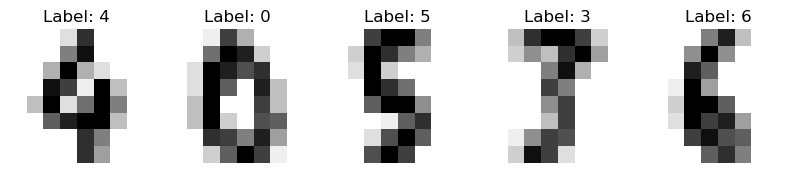

In [9]:
import matplotlib.pyplot as plt

start_index = 100

_,axes = plt.subplots(nrows=1,ncols=5,figsize = (10,3))
for ax, image, label in zip(axes,digits.images[start_index:start_index+5],digits.target[start_index:start_index+5]):
    ax.set_axis_off()
    ax.imshow(image,cmap = plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Label: %i" % label)


# Task 2: Training the model
Use k-nearest neighbors classifiers with $k\in \{1,3,5,...,27,29\}$
## Evaluation performance of the model:
-   Train Test Split
-   Cross validation

In [10]:
# Demo of using KNeighborsClassifier function from sklearn with number of neighbors k = 11
from sklearn.neighbors import KNeighborsClassifier
k = 11
knn_11 = KNeighborsClassifier(n_neighbors=k) 

In [14]:
# Preparing data for training knn_11
## flatten the images or using data (which has been flatten)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))
# data = digits.data
print(data.shape)
# Each image is flatten to a vector of 8*8 = 64 components
# There are total 1797 images of digit in our dataset

(1797, 64)


In [26]:
print(data.max())
print(data.min())

16.0
0.0


In [23]:
# Normalization 
# Why devided by 16 not 255? max min
X = data/16
y = digits.target

In [24]:
X[190]

array([0.    , 0.125 , 0.9375, 0.9375, 0.375 , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.625 , 0.8125, 1.    , 0.3125, 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.125 , 1.    , 0.5625, 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.1875, 1.    , 0.6875, 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.8125, 0.875 , 0.0625, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.4375, 1.    , 0.3125, 0.    ,
       0.    , 0.0625, 0.25  , 0.375 , 0.8125, 0.9375, 0.0625, 0.    ,
       0.    , 0.1875, 0.9375, 0.875 , 0.6875, 0.125 , 0.    , 0.    ])

### Task 2.1: Train Test split

In [16]:
from sklearn.model_selection import train_test_split

In [27]:
# Split data into 80% train and 20% test subsets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [28]:
print("Number of samples in the train subset:", len(y_train))
print("Number of samples in the test subset:", len(y_test))

Number of samples in the train subset: 1437
Number of samples in the test subset: 360


In [29]:
# Training for our knn model (knn_11)
knn_11.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [32]:
pred_test_knn11 = knn_11.predict(X_test)

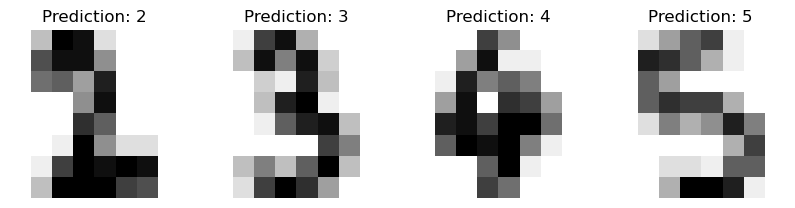

In [33]:
# Visualize the first 4 test samples and show their predicted digit value in the title.
_,axes = plt.subplots(nrows = 1,ncols = 4, figsize= (10,4))
for ax, image, prediction in zip(axes,X_test,pred_test_knn11):
    ax.set_axis_off()
    image = image.reshape((8,8))
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
    ax.set_title(f"Prediction: {prediction}")

In [34]:
# Classification report:
from sklearn import metrics
print(f"Classification report for classifier {knn_11}:\n"
      f"{metrics.classification_report(y_test,pred_test_knn11)}\n")

Classification report for classifier KNeighborsClassifier(n_neighbors=11):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       0.95      1.00      0.97        36
           2       1.00      0.97      0.99        35
           3       0.97      0.81      0.88        37
           4       1.00      0.92      0.96        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.90      1.00      0.95        36
           8       0.83      0.88      0.85        33
           9       0.97      0.92      0.94        37

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360




Confusion matrix:
[[35  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 1  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  1  0  2  4  0]
 [ 0  0  0  0 34  0  0  1  2  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  0  0  0  0  1 29  1]
 [ 0  0  0  1  0  2  0  0  0 34]]


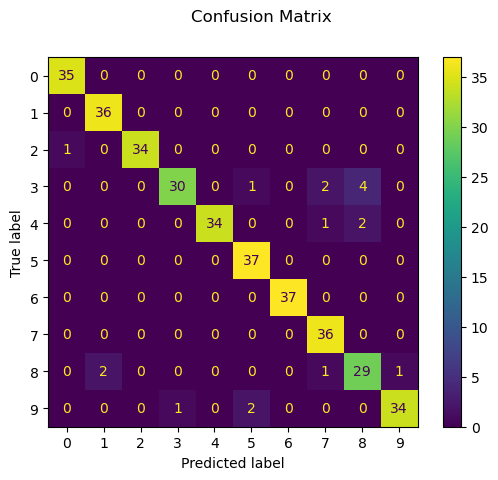

In [35]:
# Confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,pred_test_knn11)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [38]:
report = metrics.classification_report(y_test,pred_test_knn11,output_dict=True)

In [40]:
print(report["accuracy"])

0.95
